In [4]:
!pip install vaderSentiment
!pip install textblob
!pip install pivottablejs
!pip install scikit-plot

In [5]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scikitplot.metrics import plot_confusion_matrix
import pickle

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers

## Data Preprocessing

1. Combine the  Dow Jones Industrial Average stock and global news data into a pandas dataframe
2. Perform sentiment analysis on the news and add it to the dataframe
3. Remove all unnecesarry data from the dataframe

In [6]:
data = pd.read_csv("Combined_News_DJIA.csv")
data2 = pd.read_csv("upload_DJIA_table.csv")
RedditNews = pd.read_csv("RedditNews.csv")

In [7]:
data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [8]:
data2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [9]:
# merge stock price and news data
merge = data.merge(data2,how="inner",on="Date")
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


In [10]:
# combine all news headlines in a row
headline=[]
for row in range(0,len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row,2:27]))

clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i])) #remove b'
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i]) #remove b"
    clean_headline[i]=re.sub("\'",'',clean_headline[i]) #remove \'

merge['Combined_News'] = clean_headline
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,All the experts admit that we should legalise ...


In [11]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [14]:
merge['Subjectivity'] = merge['Combined_News'].apply(get_subjectivity)
merge['Polarity'] = merge['Combined_News'].apply(get_polarity)

In [13]:
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News,Subjectivity,Polarity
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302


In [15]:
compound = []
neg = []
pos = []
neu = []
SIA = 0
for i in range (0, len(merge['Combined_News'])):
    SIA = getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

merge['compound'] = compound
merge['neg'] = neg
merge['pos'] = pos
merge['neu'] = neu

In [17]:
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,Combined_News,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9715,0.128,0.056,0.816


In [18]:
df = merge[['Label','Open', 'High', 'Low','Volume','Subjectivity','Polarity','compound','neg','pos','neu']]
df

,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,0,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...,...
1984,0,17355.210938,17355.210938,17063.080078,138740000,0.352311,-0.014015,-0.9644,0.148,0.094,0.758
1985,1,17190.509766,17409.720703,17190.509766,112190000,0.352649,0.046560,-0.9571,0.132,0.102,0.767
1986,1,17456.019531,17704.509766,17456.019531,106380000,0.389617,0.052622,-0.9975,0.225,0.091,0.684
1987,1,17712.759766,17930.609375,17711.800781,133030000,0.382566,0.011243,-0.9977,0.202,0.061,0.738


In [32]:
X = df
X = np.array(X.drop(['Label'], axis=1))
y = np.array(df['Label'])
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.1, random_state=0)

## Linear Discriminant Analysis

In [33]:
LDA_model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [34]:
LDA_predict = LDA_model.predict(x_test)

<AxesSubplot:title={'center':'Linear Discriminant Analysis'}, xlabel='Predicted label', ylabel='True label'>

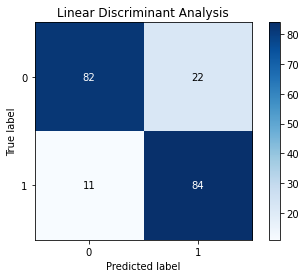

In [35]:
plot_confusion_matrix(y_test, LDA_predict, title="Linear Discriminant Analysis")

In [36]:
print(classification_report(y_test, LDA_predict))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       104
           1       0.79      0.88      0.84        95

    accuracy                           0.83       199
   macro avg       0.84      0.84      0.83       199
weighted avg       0.84      0.83      0.83       199



## Random Forest Classifier

In [37]:
model_params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

RFC_model = RandomizedSearchCV(RandomForestClassifier(), model_params, n_iter=10, cv=5, random_state=1).fit(x_train, y_train)

In [38]:
RFC_predict = RFC_model.predict(x_test)

<AxesSubplot:title={'center':'Random Forest Classifier'}, xlabel='Predicted label', ylabel='True label'>

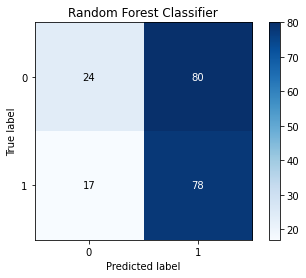

In [39]:
plot_confusion_matrix(y_test, RFC_predict, title="Random Forest Classifier")

In [40]:
print(classification_report(y_test, RFC_predict))

              precision    recall  f1-score   support

           0       0.59      0.23      0.33       104
           1       0.49      0.82      0.62        95

    accuracy                           0.51       199
   macro avg       0.54      0.53      0.47       199
weighted avg       0.54      0.51      0.47       199



## Multilayer Perceptron

In [41]:
tf.random.set_seed(0)

In [42]:
MLP_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=10),
    layers.BatchNormalization(),  # Batch normalization layer for input normalization
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.35),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

MLP_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

MLP_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                      

In [43]:
MLP_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/50
112/112 [==============================] - 3s 10ms/step - loss: 0.6960 - accuracy: 0.5101 - val_loss: 0.6953 - val_accuracy: 0.4824
Epoch 2/50
112/112 [==============================] - 1s 6ms/step - loss: 0.6922 - accuracy: 0.5391 - val_loss: 0.6917 - val_accuracy: 0.5276
Epoch 3/50
112/112 [==============================] - 1s 6ms/step - loss: 0.6909 - accuracy: 0.5291 - val_loss: 0.6909 - val_accuracy: 0.5075
Epoch 4/50
112/112 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5274 - val_loss: 0.6949 - val_accuracy: 0.4925
Epoch 5/50
112/112 [==============================] - 1s 6ms/step - loss: 0.6909 - accuracy: 0.5436 - val_loss: 0.6982 - val_accuracy: 0.4874
Epoch 6/50
112/112 [==============================] - 1s 6ms/step - loss: 0.6903 - accuracy: 0.5391 - val_loss: 0.6941 - val_accuracy: 0.4975
Epoch 7/50
112/112 [==============================] - 1s 6ms/step - loss: 0.6898 - accuracy: 0.5330 - val_loss: 0.6960 - val_accuracy: 0.4774
Epoch

In [44]:
pred = MLP_model.predict(x_test)

7/7 [==============================] - 0s 4ms/step


In [45]:
MLP_predict = np.where(pred > 0.5, 1, 0)

<AxesSubplot:title={'center':'Multilayer Perceptron'}, xlabel='Predicted label', ylabel='True label'>

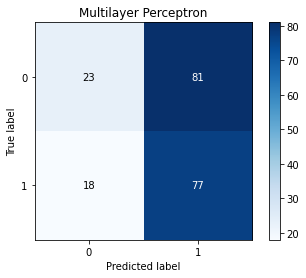

In [46]:
plot_confusion_matrix(y_test, MLP_predict, title="Multilayer Perceptron")

In [47]:
print(classification_report(y_test, MLP_predict))

              precision    recall  f1-score   support

           0       0.56      0.22      0.32       104
           1       0.49      0.81      0.61        95

    accuracy                           0.50       199
   macro avg       0.52      0.52      0.46       199
weighted avg       0.53      0.50      0.46       199



## Multilayer Perceptron with Windows

Basically, the last n days of data are provided per sample

In [48]:
# the past window_size samples are included in each data sample
def reshape_data(df, window_size):
    reshaped_data = []
    for i in range(len(df) - window_size + 1):
        window = df.iloc[i:i+window_size].values.flatten()
        reshaped_data.append(window)
    return np.array(reshaped_data)

In [49]:
window_size = 5
X_c = reshape_data(df.drop(['Label'], axis=1), window_size)
y_c = np.array(df['Label'])[window_size - 1:]

X_c.shape, y_c.shape

((1985, 50), (1985,))

In [50]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.1, random_state=0)

In [51]:
MLPC_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=10*window_size),
    layers.BatchNormalization(),  # Batch normalization layer for input normalization
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.35),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

MLPC_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

MLPC_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 256)               13056     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                      

In [52]:
MLPC_model.fit(x_train_c, y_train_c, epochs=100, batch_size=16, validation_data=(x_test_c, y_test_c))

Epoch 1/100
112/112 [==============================] - 3s 9ms/step - loss: 0.7149 - accuracy: 0.5011 - val_loss: 0.7159 - val_accuracy: 0.5578
Epoch 2/100
112/112 [==============================] - 1s 7ms/step - loss: 0.6986 - accuracy: 0.4983 - val_loss: 0.6913 - val_accuracy: 0.5427
Epoch 3/100
112/112 [==============================] - 1s 6ms/step - loss: 0.6911 - accuracy: 0.5218 - val_loss: 0.6878 - val_accuracy: 0.5628
Epoch 4/100
112/112 [==============================] - 1s 6ms/step - loss: 0.6919 - accuracy: 0.5498 - val_loss: 0.6933 - val_accuracy: 0.5729
Epoch 5/100
112/112 [==============================] - 1s 7ms/step - loss: 0.6886 - accuracy: 0.5386 - val_loss: 0.6960 - val_accuracy: 0.5477
Epoch 6/100
112/112 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.5286 - val_loss: 0.6853 - val_accuracy: 0.5528
Epoch 7/100
112/112 [==============================] - 1s 6ms/step - loss: 0.6839 - accuracy: 0.5398 - val_loss: 0.6856 - val_accuracy: 0.5126

In [53]:
pred = MLPC_model.predict(x_test_c)

7/7 [==============================] - 0s 4ms/step


In [54]:
MLPC_predict = np.where(pred > 0.5, 1, 0)

<AxesSubplot:title={'center':'Multilayer Perceptron with Windows'}, xlabel='Predicted label', ylabel='True label'>

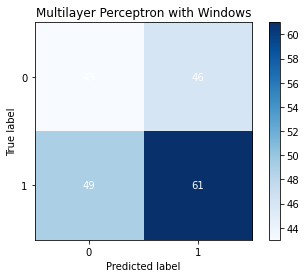

In [55]:
plot_confusion_matrix(y_test_c, MLPC_predict, title="Multilayer Perceptron with Windows")

In [56]:
print(classification_report(y_test_c, MLPC_predict))

              precision    recall  f1-score   support

           0       0.47      0.48      0.48        89
           1       0.57      0.55      0.56       110

    accuracy                           0.52       199
   macro avg       0.52      0.52      0.52       199
weighted avg       0.52      0.52      0.52       199



## Linear Discriminant Analysis with Windows

In [57]:
window_size = 14
X_c = reshape_data(df.drop(['Label'], axis=1), window_size)
y_c = np.array(df['Label'])[window_size - 1:]

X_c.shape, y_c.shape

((1976, 140), (1976,))

In [58]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.1, random_state=0)

In [59]:
LDAW_model = LinearDiscriminantAnalysis().fit(x_train_c, y_train_c)

In [60]:
LDAW_predict = LDAW_model.predict(x_test_c)

<AxesSubplot:title={'center':'Linear Discriminant Analysis with Windows'}, xlabel='Predicted label', ylabel='True label'>

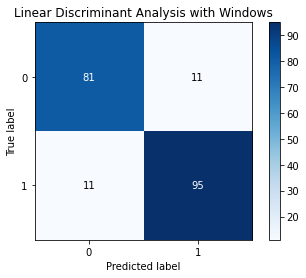

In [61]:
plot_confusion_matrix(y_test_c, LDAW_predict, title="Linear Discriminant Analysis with Windows")

In [62]:
print(classification_report(y_test_c, LDAW_predict))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        92
           1       0.90      0.90      0.90       106

    accuracy                           0.89       198
   macro avg       0.89      0.89      0.89       198
weighted avg       0.89      0.89      0.89       198



In [64]:
Pkl_Filename = "SentiTrader.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(LDAW_model, file)